# Пространственная фильтрация

**Автор**: Винник Екатерина Петровна, 22.М04

**Задание**: должна быть реализована:
- линейная фильтрация
   - однородная
   - взвешенное среднее по маскам различных размеров
- нелинейная (медианная)


## Линейная фильтрация (однородная, взвешенное среднее по маскам различных размеров)
### Теория

Идея фильтрации заключается в том, что каждый пиксель изображения обрабатывается в соответствии с его локальным окружением (часто включая самого себя). В этой модели данный пиксель обычно помещается в центр "окна" нечетного размера (также называемого «ядром» или «маской»), затем весь набор пикселей внутри маски обрабатывается в соответствии с некоторой операцией, которая возвращает новое значение для пикселя в центре. Сами операции могут быть линейными или нелинейными. В этом разделе рассматриваются только линейные операции.

Предположим, маска имеет размеры $m \times n$ , где $m = 2a + 1$ и $n = 2b + 1$,  где $a, b \in \mathbb{N}$; также предположим, что изображение имеет разрешение $M \times N$ пикселей.
Для упрощения, также предположим, что изображение имеет только один канал, т.к. обобщение до многоканального изображения может быть получено очевидным образом.
Пусть $A \in \overline{0, 255}^{M \times N}$ -- $M \times N$ матрица изображения, содержащая значения яркостей соответсвующих пикселей.
Положим также $\widehat{A} \in \overline{0, 255}^{M + 2a \times N + 2b}$ есть дополненная $A$, i.e. $\widehat{A}_{i+a, j + a} = A_{i, j}$. 
Дополнение удобно рассматривать на случай, когда маска выходит за края изображения при обработке граничного пикселя.
Пусть $w \in \mathbb{R}^{m \times n}$ матрица весов линейного фильтра. 
Линейный фильтр можно определить следующим образом:
$$
\begin{equation}
B_{i, j} = \sum_{s = -a}^{a} \sum_{s = -b}^{b} w_{s + a, t + b} A_{i + s, j + t},
\tag{1}
\end{equation}
$$
где $B_{i, j}$ -- результирующая матрица изображения после фильтрации.

Также можно определить свертку:
$$
\begin{equation}
w_{i, j} * A_{i, j} = \sum_{s = -a}^{a} \sum_{s = -b}^{b} w_{s + a, t + b} A_{i - s, j - t}.
\tag{3}
\end{equation}
$$

Фильтр, все коэффициенты которого одинаковы, называется *однородным усредняющим фильтром*.
Другой тип линейного фильтра это *взвешенное среднее*. Этот термин применяется, чтобы показать, что значения элементов умножаются на разные коэффициенты, что позволяет присвоить им как бы разные "важности" (веса) по сравнению с другими. 


Упомянутые выше типы фильтров используются для сглаживания изображения.

### Реализация

#### Однородный усредняющий фильтр

In [1]:
import numpy as np


def uniform_average(img, ker_size=3):
    h = img.shape[0]
    w = img.shape[1]
    pad_size = (ker_size - 1) // 2
    
    img_new = np.zeros_like(img, dtype=float)
    
    if len(img.shape) == 3:
        channels = img.shape[-1]
        filt = np.full((ker_size, ker_size, channels), 1 / (ker_size * ker_size))
        img_padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size, channels))
        img_padded[pad_size:-pad_size, pad_size:-pad_size, :] = img
        for i in range(h):
            for j in range(w):
                img_loc = img_padded[i:i+ker_size, j:j+ker_size, :]
                for ch in range(channels):
                    img_new[i, j, ch] = np.sum(np.multiply(img_loc[:, :, ch], filt[:, :, ch]))
    else:
        filt = np.full((ker_size, ker_size), 1 / (ker_size * ker_size))
        img_padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size))
        img_padded[pad_size:-pad_size, pad_size:-pad_size] = img
        for i in range(h):
            for j in range(w):
                img_loc = img_padded[i:i+ker_size, j:j+ker_size]
                img_new[i, j] = np.sum(np.multiply(img_loc, filt))
                
    img_new = img_new.astype(np.uint8)
    return img_new

#### Взвешенное среднее

In [2]:
import numpy as np


def apply_w_av(img, filt):
    h = img.shape[0]
    w = img.shape[1]
    ker_size = filt.shape[0]
    pad_size = (ker_size - 1) // 2
    
    img_new = np.zeros_like(img, dtype=float)
    
    if len(img.shape) == 3:
        channels = img.shape[-1]
        for ch in range(channels):
            filt[:, :, ch] = filt[:, :, ch] / np.sum(filt[:, :, ch])
        img_padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size, channels))
        img_padded[pad_size:-pad_size, pad_size:-pad_size, :] = img
        for i in range(h):
            for j in range(w):
                img_loc = img_padded[i:i+ker_size, j:j+ker_size, :]
                for ch in range(channels):
                    img_new[i, j, ch] = np.sum(np.multiply(img_loc[:, :, ch], filt[:, :, ch]))
    else:
        filt = filt / np.sum(filt)
        img_padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size))
        img_padded[pad_size:-pad_size, pad_size:-pad_size] = img
        for i in range(h):
            for j in range(w):
                img_loc = img_padded[i:i+ker_size, j:j+ker_size]
                img_new[i, j] = np.sum(np.multiply(img_loc, filt))
                
    img_new = img_new.astype(np.uint8)
    return img_new

#### Гауссова функция

In [3]:
import numpy as np


def get_gaussian_kernel(ker_size=3):
    kernel = np.zeros((ker_size, ker_size))
    a = (ker_size - 1) // 2
    for i in range(ker_size):
        for j in range(ker_size):
            s = i - a
            t = j - a
            kernel[i, j] = np.exp(-(s*s + t*t) / 2.)
            
    kernel = kernel / np.sum(kernel)
            
    return kernel

### Результаты применения линейной фильтрации к изображениям

Загрузим изображения для дальнейшей обработки:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# http://pages.cs.wisc.edu/~lizhang/projects/autoexpo/content/text.html
img_1 = Image.open('./text1.png')
img_2 = Image.open('./images.webp')

In [5]:
# represent the images as tensors
np_1 = np.array(img_1)
np_2 = np.array(img_2)
print('Размеры изображений:')
print(np_1.shape)
print(np_2.shape)

Размеры изображений:
(450, 450, 3)
(683, 500, 3)


#### Применение линейной фильтрации к первому изображению
##### Применение однородной фильтрации

Применим к первому изображению (изображению с текстом) однородную фильтрацию для разных размеров маски -- 3, 5 и 9 соответственно, чтобы сравнить результаты применения с исходным изображением.

In [6]:
np_1_b3 = uniform_average(np_1, 3)

In [7]:
np_1_b5 = uniform_average(np_1, 5)

In [8]:
np_1_b9 = uniform_average(np_1, 9)

Рассмотрим исходное изображение и изображения, получившиеся в результате применения однородной фильтрации при размерах маски, равных 3, 5, 9.

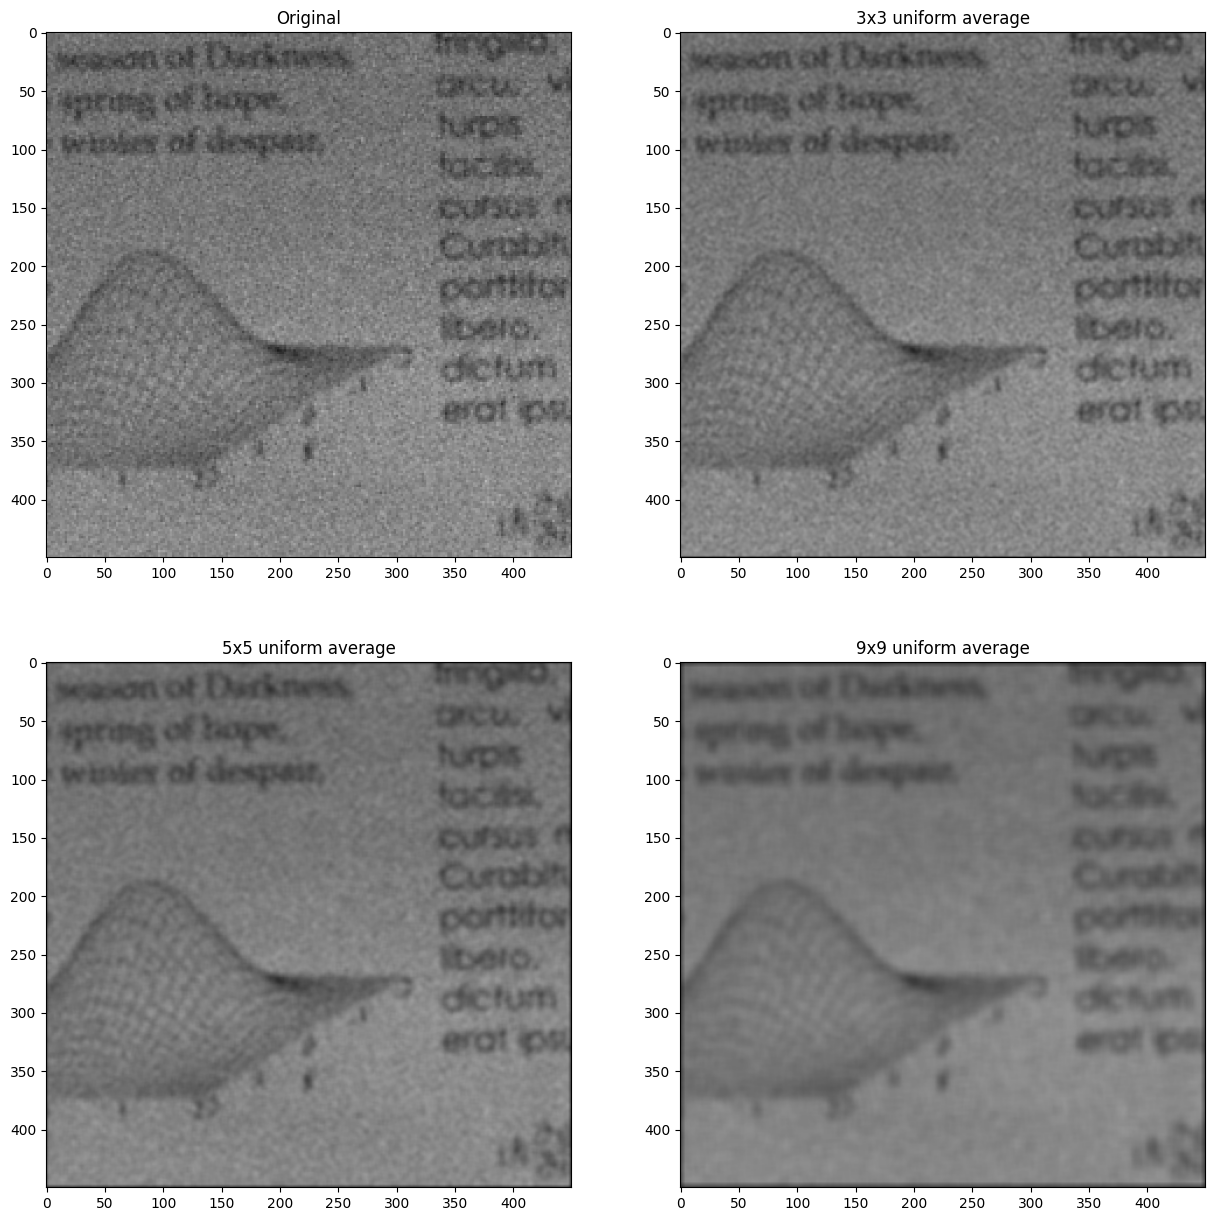

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].imshow(np_1)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(np_1_b3)
axs[0, 1].set_title('3x3 uniform average')
axs[1, 0].imshow(np_1_b5)
axs[1, 0].set_title('5x5 uniform average')
axs[1, 1].imshow(np_1_b9)
axs[1, 1].set_title('9x9 uniform average')
plt.show()

Первое изображение обладает мелкозернистым шумом, который делает текст на изображении трудно читаемым. При $n=3$ можно заметить легкую расфокусировку на всем изображении, более всего фильтрация при $n=3$ повлияла на мелкие детали, близкие к размерам фильтра, т.е., на мелкие белые засветы шума на изображении. При $n=5$ шум стал менее выраженным, что позволяет читать текст, изображенный на картинке -- например, становятся видны слова *hope*, *despair*. При $n=15$ можно увидеть значительно более сильную расфокусировку -- буквы текста начинают сливаться, демонстрируя тем самым эффект смешивания, являющийся результатом расфокусировки. 

Для данного изображения наиболее подошла фильтрация при $n=5$ -- фильтрация при $n=3$ не дала нужного сглаживания, а фильтрация при $n=15$ чрезмерно расфокусировала изображение.

##### Применение взвешенной средней фильтрации к первому изображению
Рассмотрим применение взвешенного среднего фильтра, whose weights form the shape of the Gaussian distribution:

In [10]:
# get the kernels
norm3 = np.repeat(get_gaussian_kernel(3).reshape((3, 3, 1)), 3, axis=2)
norm9 = np.repeat(get_gaussian_kernel(9).reshape((9, 9, 1)), 3, axis=2)
norm15 = np.repeat(get_gaussian_kernel(15).reshape((15, 15, 1)), 3, axis=2)

Apply gaussian weighted average filtering for the 1st image:

In [11]:
np_1_w3 = apply_w_av(np_1, norm3)

In [12]:
np_1_w9 = apply_w_av(np_1, norm9)

In [13]:
np_1_w15 = apply_w_av(np_1, norm15)

1st image before and after the weighted average filtering:

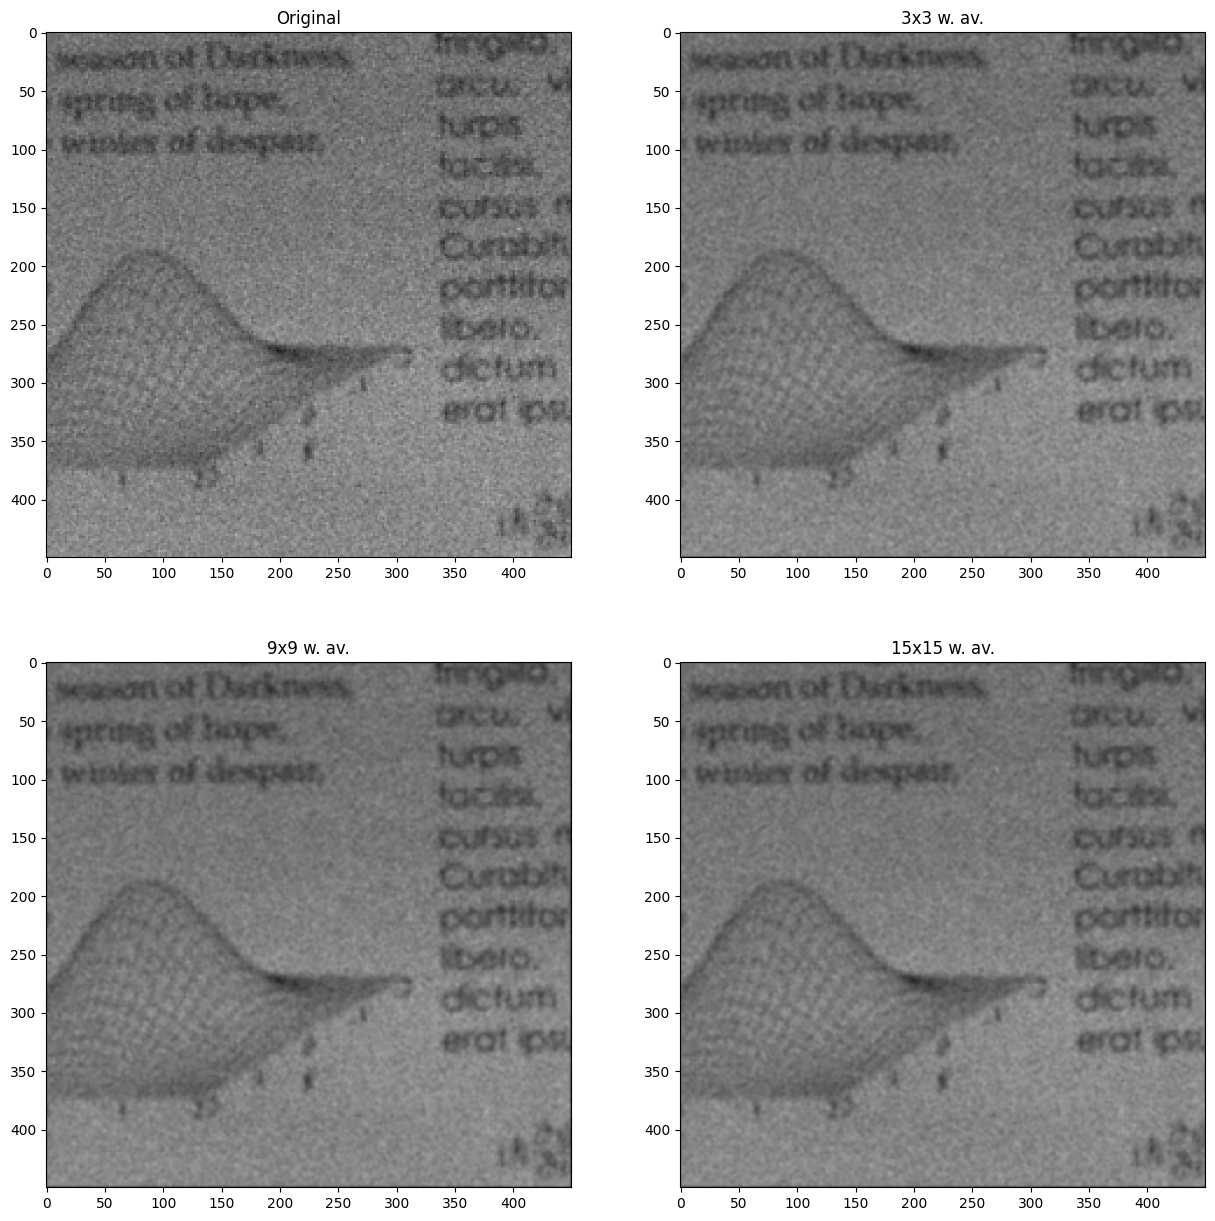

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].imshow(np_1)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(np_1_w3)
axs[0, 1].set_title('3x3 w. av.')
axs[1, 0].imshow(np_1_w9)
axs[1, 0].set_title('9x9 w. av.')
axs[1, 1].imshow(np_1_w15)
axs[1, 1].set_title('15x15 w. av.')
plt.show()

It is clear that the weighted average filter does not erode the image that badly as the box filter does.
At the same time, it improves readability of the text.


#### Применение линейной фильтрации ко второй изображению
Now let's try to improve the 2nd image:

In [15]:
np_2_b5 = uniform_average(np_2, 19)

2nd image before and after the weighted average filtering:

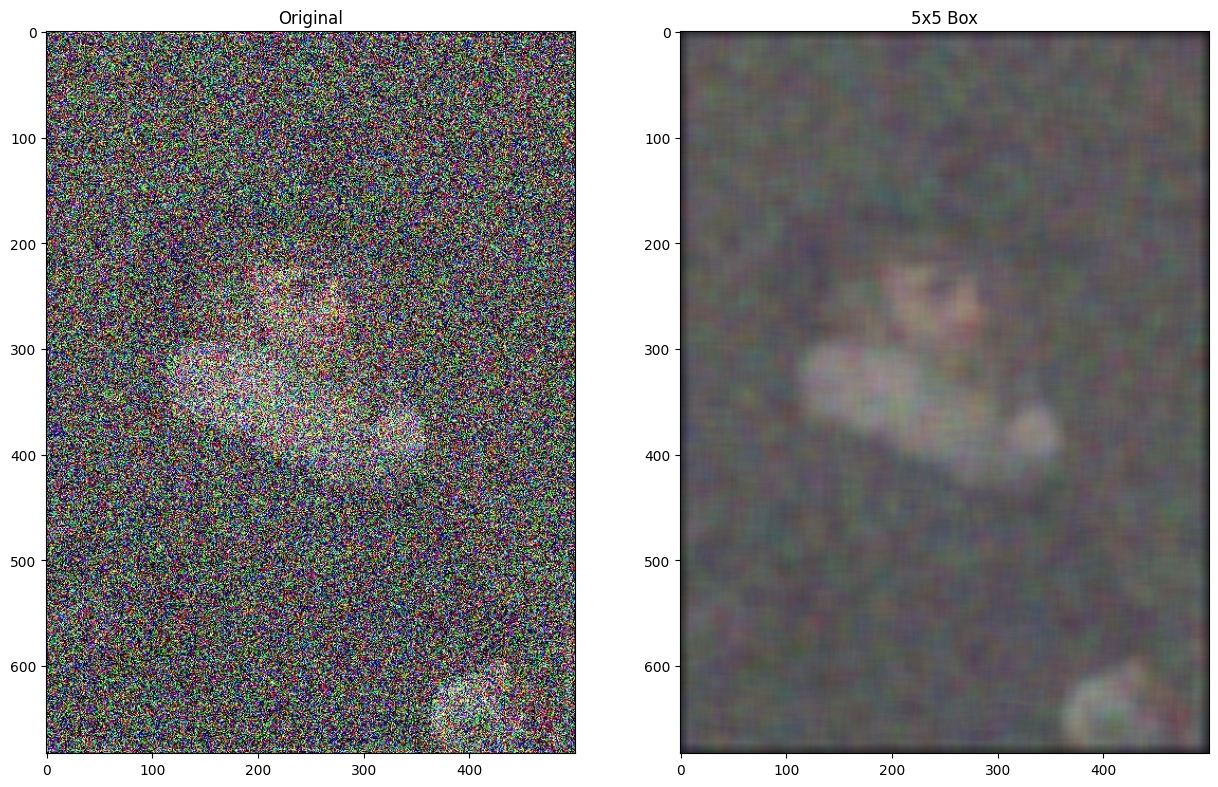

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(np_2, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(np_2_b5, cmap='gray')
axs[1].set_title('5x5 Box')
plt.show()

## Nonlinear filtering
### Theory

Nonlinear filters often use order-statistical information about contents of a mask.
For example, one may find a median value among the values of intensity of the pixels inside the kernel.
The median filter is a great solution for the task of image restoration, where some pixels may be missed.

### Code

#### Median filter

In [17]:
import numpy as np


def apply_median(img, ker_size=3):
    h = img.shape[0]
    w = img.shape[1]
    pad_size = (ker_size - 1) // 2
    
    img_new = np.zeros_like(img, dtype=float)
    
    if len(img.shape) == 3:
        channels = img.shape[-1]
        img_padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size, channels))
        img_padded[pad_size:-pad_size, pad_size:-pad_size, :] = img
        for i in range(h):
            for j in range(w):
                img_loc = img_padded[i:i+ker_size, j:j+ker_size, :]
                for ch in range(channels):
                    img_new[i, j, ch] = np.median(img_loc[:, :, ch])
    else:
        img_padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size))
        img_padded[pad_size:-pad_size, pad_size:-pad_size] = img
        for i in range(h):
            for j in range(w):
                img_loc = img_padded[i:i+ker_size, j:j+ker_size]
                img_new[i, j] = np.median(img_loc[:, :])
                
    img_new = img_new.astype(np.uint8)
    return img_new

### Results

#### Processing + visualization

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# From R. Gonzales, R. Woods "Digital Image Processing"
img_21 = Image.open('./sch.tif')

In [19]:
# represent the images as tensors
np_21 = np.array(img_21)
print('Picture dimensions:')
print(np_21.shape)

Picture dimensions:
(440, 455)


Apply median filtering to the image:

In [20]:
np_21_m3 = apply_median(np_21, 3)

In [21]:
np_21_m5 = apply_median(np_21, 5)

In [22]:
np_21_m9 = apply_median(np_21, 9)

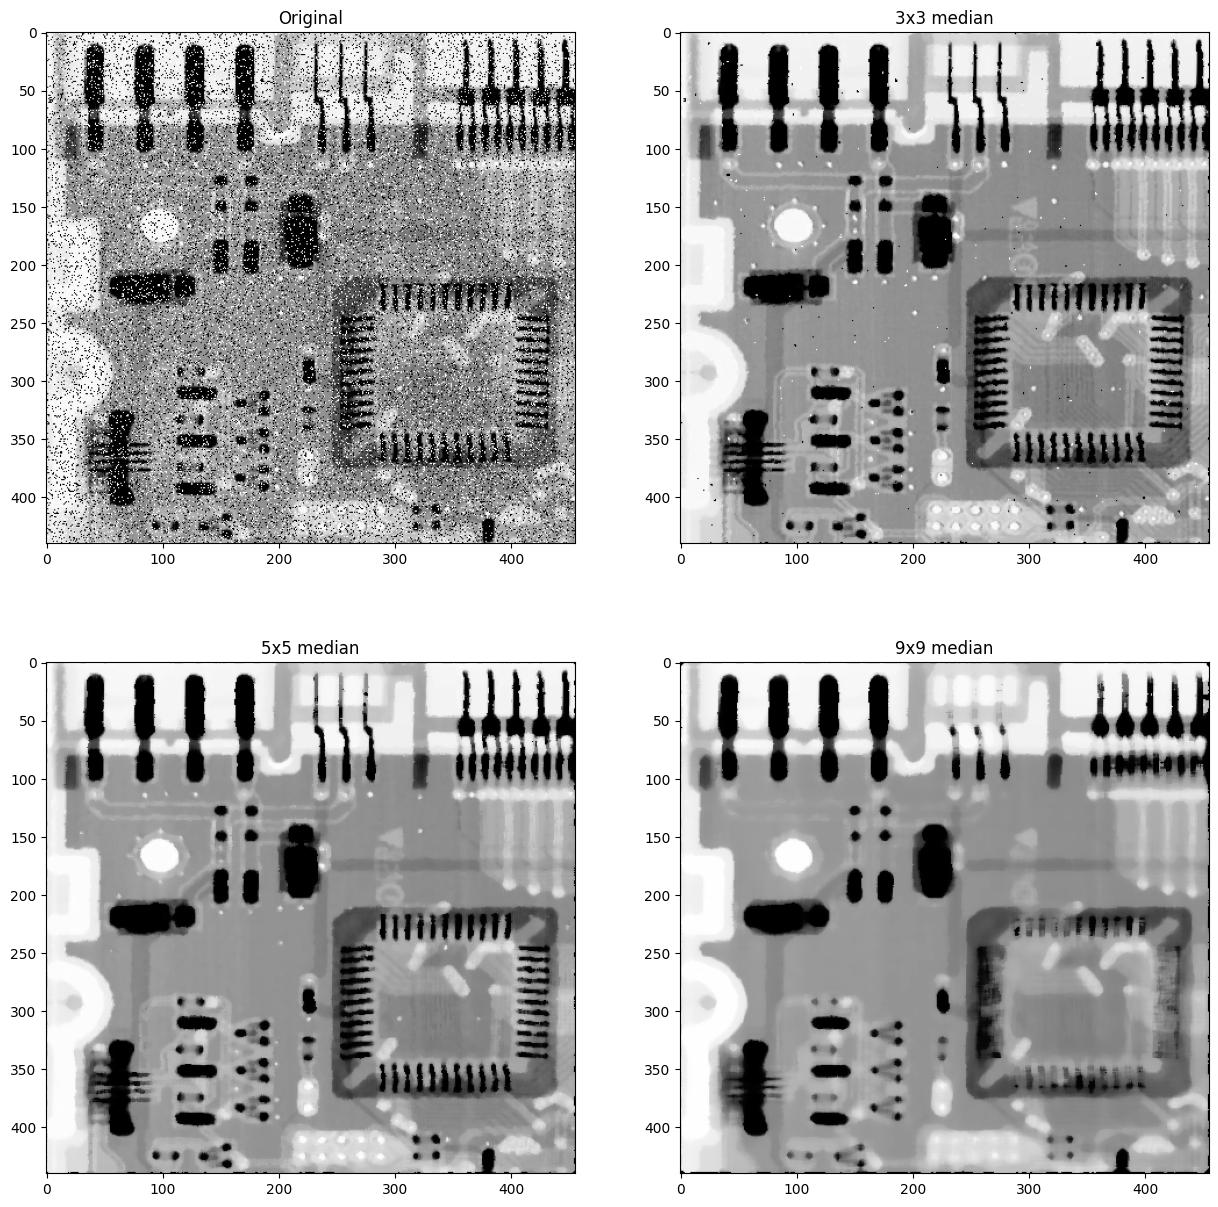

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].imshow(np_21, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 1].imshow(np_21_m3, cmap='gray')
axs[0, 1].set_title('3x3 median')
axs[1, 0].imshow(np_21_m5, cmap='gray')
axs[1, 0].set_title('5x5 median')
axs[1, 1].imshow(np_21_m9, cmap='gray')
axs[1, 1].set_title('9x9 median')
plt.show()